In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
df = pd.read_csv('StudentsPerformance.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [48]:
df.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [49]:
df.duplicated().sum()

np.int64(0)

In [50]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [51]:
df['gender'].unique()

array(['female', 'male'], dtype=object)

In [52]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [53]:
df.rename(columns={
    'race/ethnicity': 'race_ethnicity',
    'parental level of education' : "parental_level_of_eductaion",
    'test preparation course' : 'test_preparation_course',
    'writing score' : 'writing_score', 
    'reading score': 'reading_score',
    'math score': 'math_score',
    },inplace=True
    )

In [54]:
df

,gender,race_ethnicity,parental_level_of_eductaion,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [55]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [56]:
writing_full = df[df['writing_score'] == 100]['writing_score'].count()
reading_full = df[df['reading_score'] == 100]['reading_score'].count()
math_full = df[df['math_score'] == 100]['math_score'].count()

print("Number of students with full marks in Writing: " , writing_full)
print("Number of students with full marks in Reading: " , reading_full)
print("Number of students with full marks in Math: " , math_full)

Number of students with full marks in Writing:  14
Number of students with full marks in Reading:  17
Number of students with full marks in Math:  7


In [57]:
pass_grade = 50

df['pass_writing'] = 'yes'
filt = (df['writing_score'] < pass_grade)
df.loc[filt,'pass_writing'] = 'no'
df[['writing_score','pass_writing']].head()

df['pass_reading'] = 'yes'
filt = (df['reading_score'] < pass_grade)
df.loc[filt,'pass_reading'] = 'no'
df[['reading_score','pass_reading']].head()

df['pass_math'] = 'yes'
filt = (df['math_score'] < pass_grade)
df.loc[filt,'pass_math'] = 'no'
df[['math_score','pass_math']].head()

df

,gender,race_ethnicity,parental_level_of_eductaion,lunch,test_preparation_course,math_score,reading_score,writing_score,pass_writing,pass_reading,pass_math
0,female,group B,bachelor's degree,standard,none,72,72,74,yes,yes,yes
1,female,group C,some college,standard,completed,69,90,88,yes,yes,yes
2,female,group B,master's degree,standard,none,90,95,93,yes,yes,yes
3,male,group A,associate's degree,free/reduced,none,47,57,44,no,yes,no
4,male,group C,some college,standard,none,76,78,75,yes,yes,yes
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,yes,yes,yes
996,male,group C,high school,free/reduced,none,62,55,55,yes,yes,yes
997,female,group C,high school,free/reduced,completed,59,71,65,yes,yes,yes
998,female,group D,some college,standard,completed,68,78,77,yes,yes,yes


In [58]:
pass_writing_count = df.groupby("pass_writing")["pass_writing"].count()
pass_writing_count

pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64

In [59]:
pass_reading_count = df.groupby("pass_reading")["pass_reading"].count()
pass_reading_count

pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64

In [60]:
pass_math_count = df.groupby("pass_math")["pass_math"].count()
pass_math_count

pass_math
no     135
yes    865
Name: pass_math, dtype: int64

Average score:
Writing: 68.054 
Reading: 69.169 
Math: 66.089


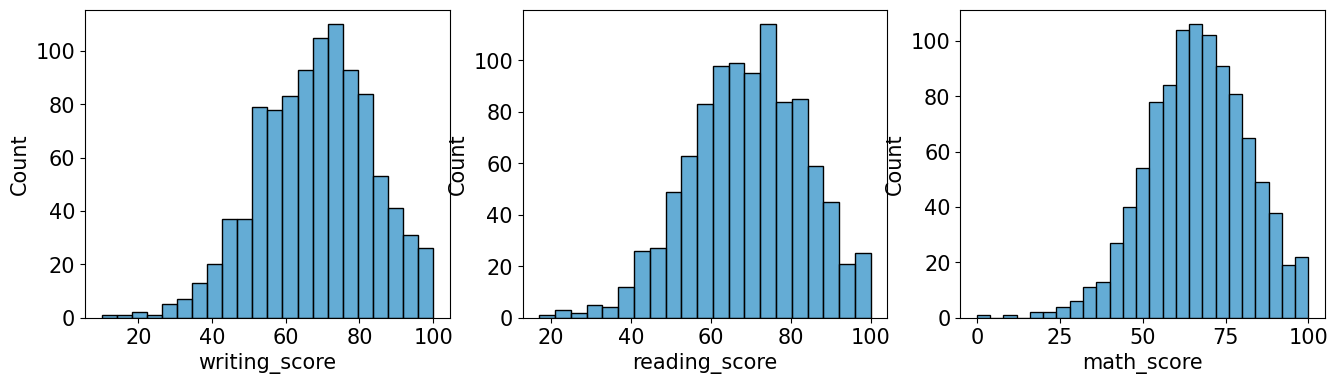

In [61]:
fig , ax = plt.subplots(1,3 , figsize = (16,4))

sns.histplot(data = df , x = "writing_score" , ax=ax[0] , color = "#3090C7")
sns.histplot(data = df , x = "reading_score" , ax=ax[1] , color = "#3090C7")
sns.histplot(data = df , x = "math_score" , ax=ax[2] , color = "#3090C7")

writing_mean = df["writing_score"].mean()
reading_mean = df["reading_score"].mean()
math_mean = df["math_score"].mean()

print("Average score:\nWriting:", writing_mean, "\nReading:", reading_mean , "\nMath:", math_mean)
plt.show()

pass_writing
no     114
yes    886
Name: pass_writing, dtype: int64
pass_reading
no      90
yes    910
Name: pass_reading, dtype: int64
pass_math
no     135
yes    865
Name: pass_math, dtype: int64


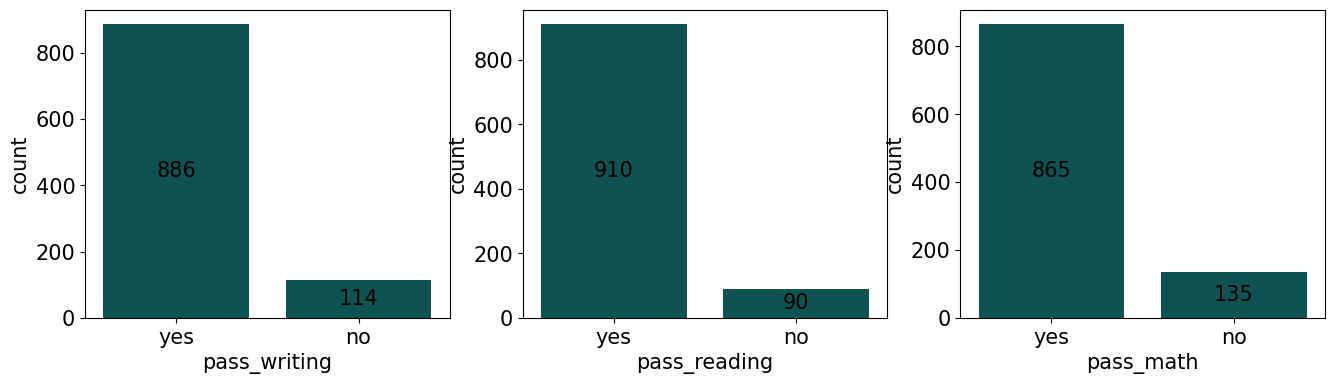

In [62]:
fig , ax = plt.subplots(1,3 , figsize = (16,4))

count_writing = sns.countplot(data = df , x = "pass_writing" , ax=ax[0] , color = "#045D5D")
count_reading = sns.countplot(data = df , x = "pass_reading" , ax=ax[1] , color = "#045D5D")
count_math = sns.countplot(data = df , x = "pass_math" , ax=ax[2] , color = "#045D5D")

pass_writing_count = df.groupby("pass_writing")["pass_writing"].count()
print(pass_writing_count)

pass_reading_count = df.groupby("pass_reading")["pass_reading"].count()
print(pass_reading_count)

pass_math_count = df.groupby("pass_math")["pass_math"].count()
print(pass_math_count)

for label in (count_writing, count_reading, count_math):
    for container in label.containers:
        label.bar_label(container ,label_type='center')
        
plt.show()


In [63]:
df['parental_level_of_eductaion'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

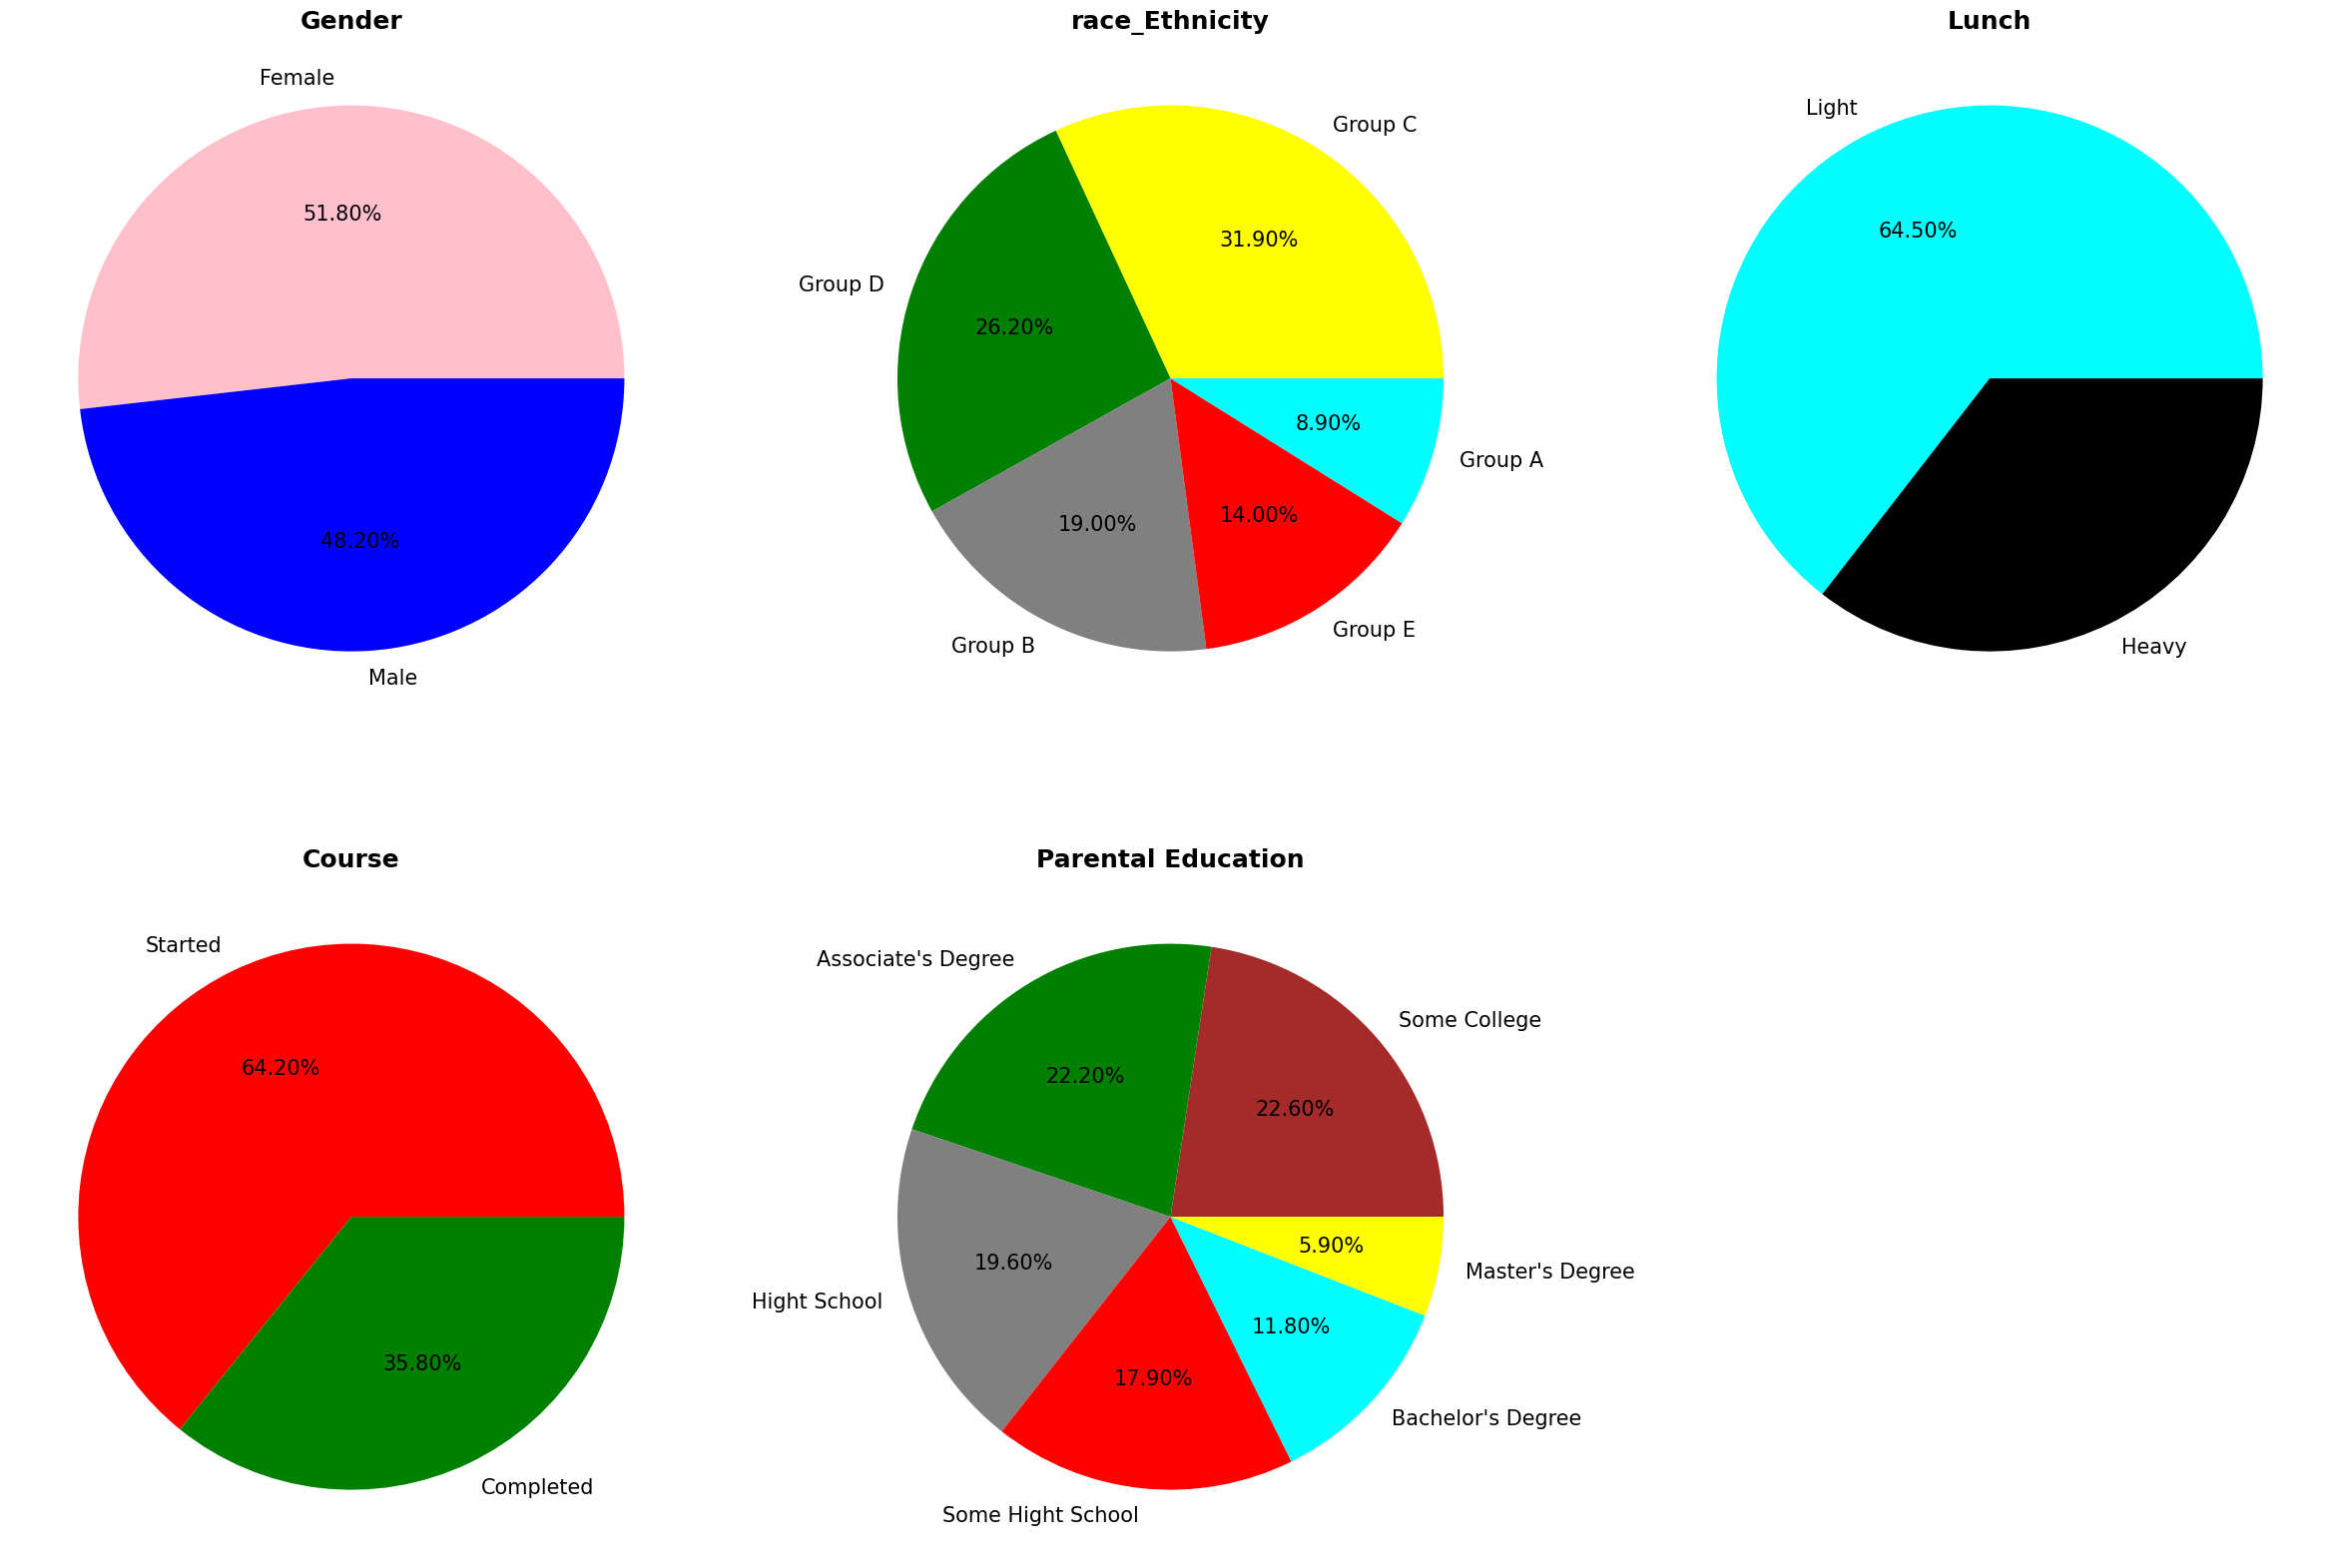

In [64]:
plt.rcParams["figure.figsize"]= (30,20)
plt.rcParams["font.size"]=15

plt.subplot(2,3,1)
size = df["gender"].value_counts()
labels = "Female", "Male"
color = ["pink", "blue"]

plt.pie(size , colors = color , labels= labels , autopct = "%.2f%%")
plt.title("Gender" , fontweight = "bold")


plt.subplot(2,3,2)
size = df["race_ethnicity"].value_counts()
labels = "Group C", "Group D", "Group B", "Group E", "Group A"
color = ["yellow", "green", "gray", "red", "cyan"]

plt.pie(size , colors = color , labels= labels , autopct = "%.2f%%")
plt.title("race_Ethnicity" , fontweight = "bold")


plt.subplot(2,3,3)
size = df["lunch"].value_counts()
labels = "Light" , "Heavy"
color = ["cyan", "black"]

plt.pie(size , colors = color , labels= labels , autopct = "%.2f%%")
plt.title("Lunch" , fontweight = "bold")


plt.subplot(2,3,4)
size = df["test_preparation_course"].value_counts()
labels = "Started" , "Completed"
color = ["red", "green"]

plt.pie(size , colors = color , labels= labels , autopct = "%.2f%%")
plt.title("Course" , fontweight = "bold")


plt.subplot(2,3,5)
size = df["parental_level_of_eductaion"].value_counts()
labels = "Some College" , "Associate's Degree" , "Hight School", "Some Hight School" , "Bachelor's Degree" , "Master's Degree"
color = ["brown", "green", "gray", "red", "cyan" , "yellow"]

plt.pie(size , colors = color , labels= labels , autopct = "%.2f%%")
plt.title("Parental Education" , fontweight = "bold")

plt.show()

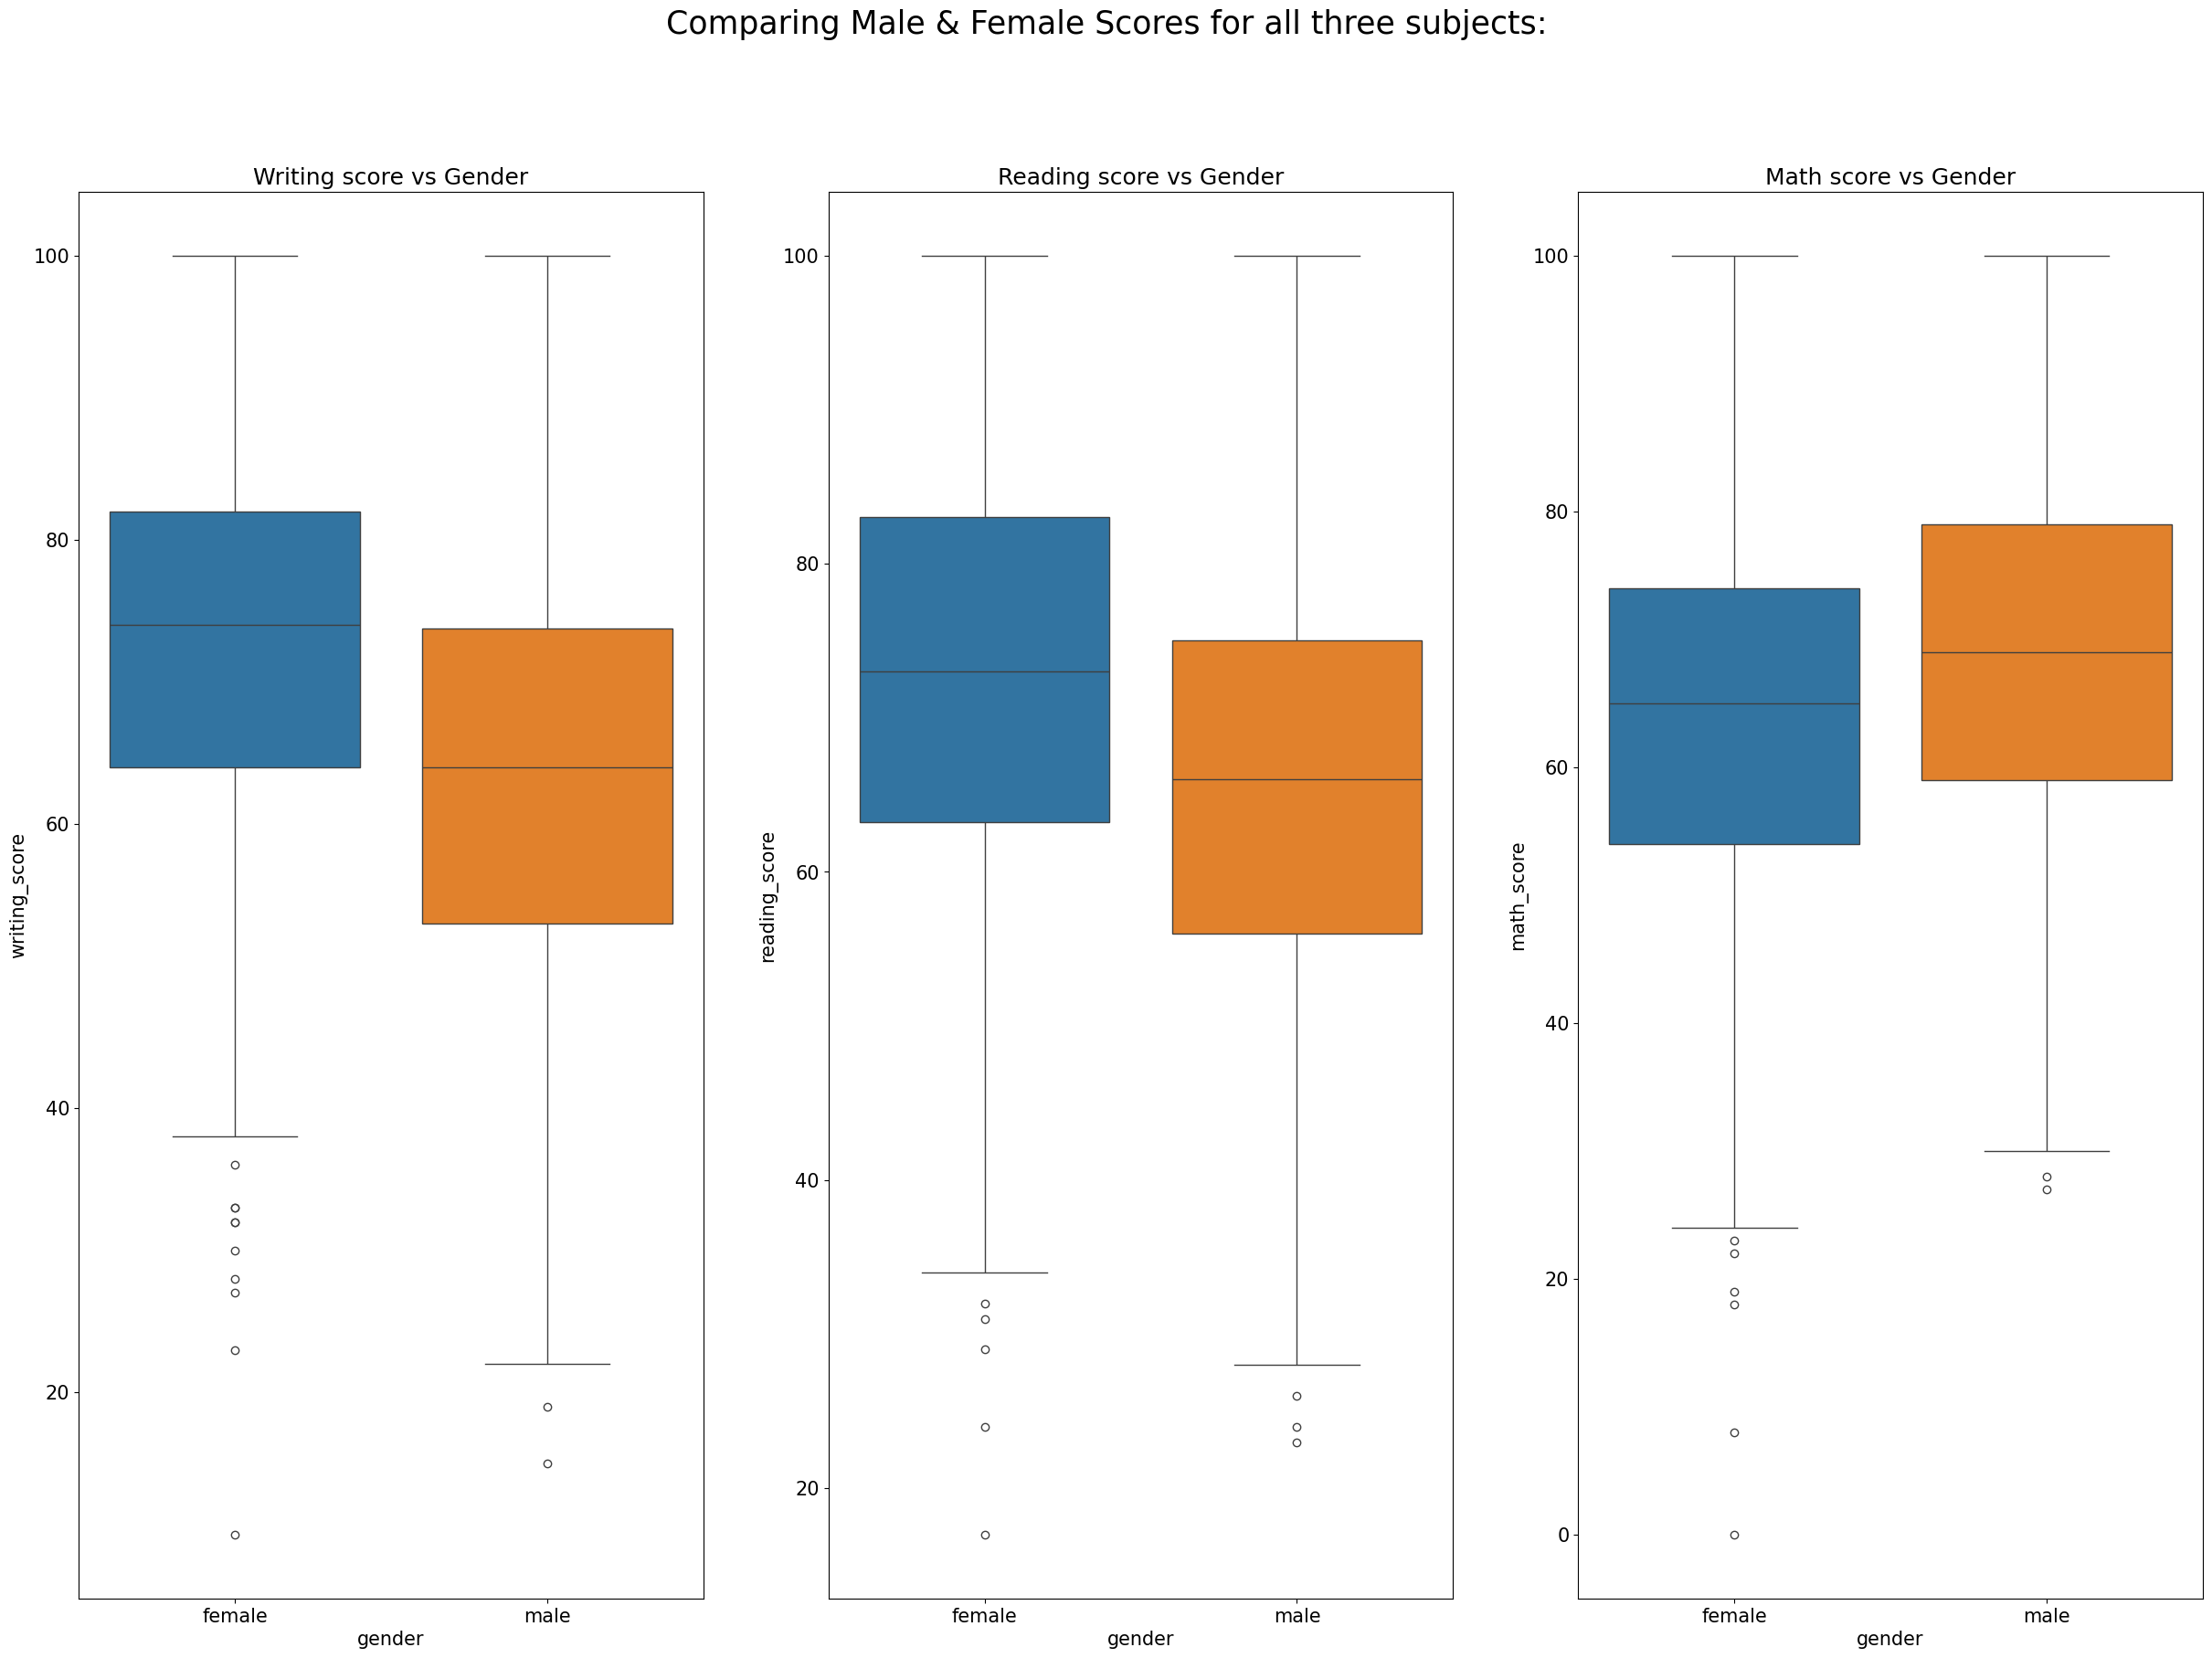

In [65]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle("Comparing Male & Female Scores for all three subjects:" , fontsize= 25)

sns.boxplot(x = "gender", y="writing_score" , data=df , ax=ax1 , hue= "gender")
ax1.title.set_text("Writing score vs Gender")

sns.boxplot(x = "gender", y="reading_score" , data=df , ax=ax2 , hue= "gender")
ax2.title.set_text("Reading score vs Gender")

sns.boxplot(x = "gender", y="math_score" , data=df , ax=ax3 , hue= "gender")
ax3.title.set_text("Math score vs Gender")


C:\Users\user\AppData\Local\Temp\ipykernel_4732\4245738076.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)
C:\Users\user\AppData\Local\Temp\ipykernel_4732\4245738076.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)
C:\Users\user\AppData\Local\Temp\ipykernel_4732\4245738076.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 15)


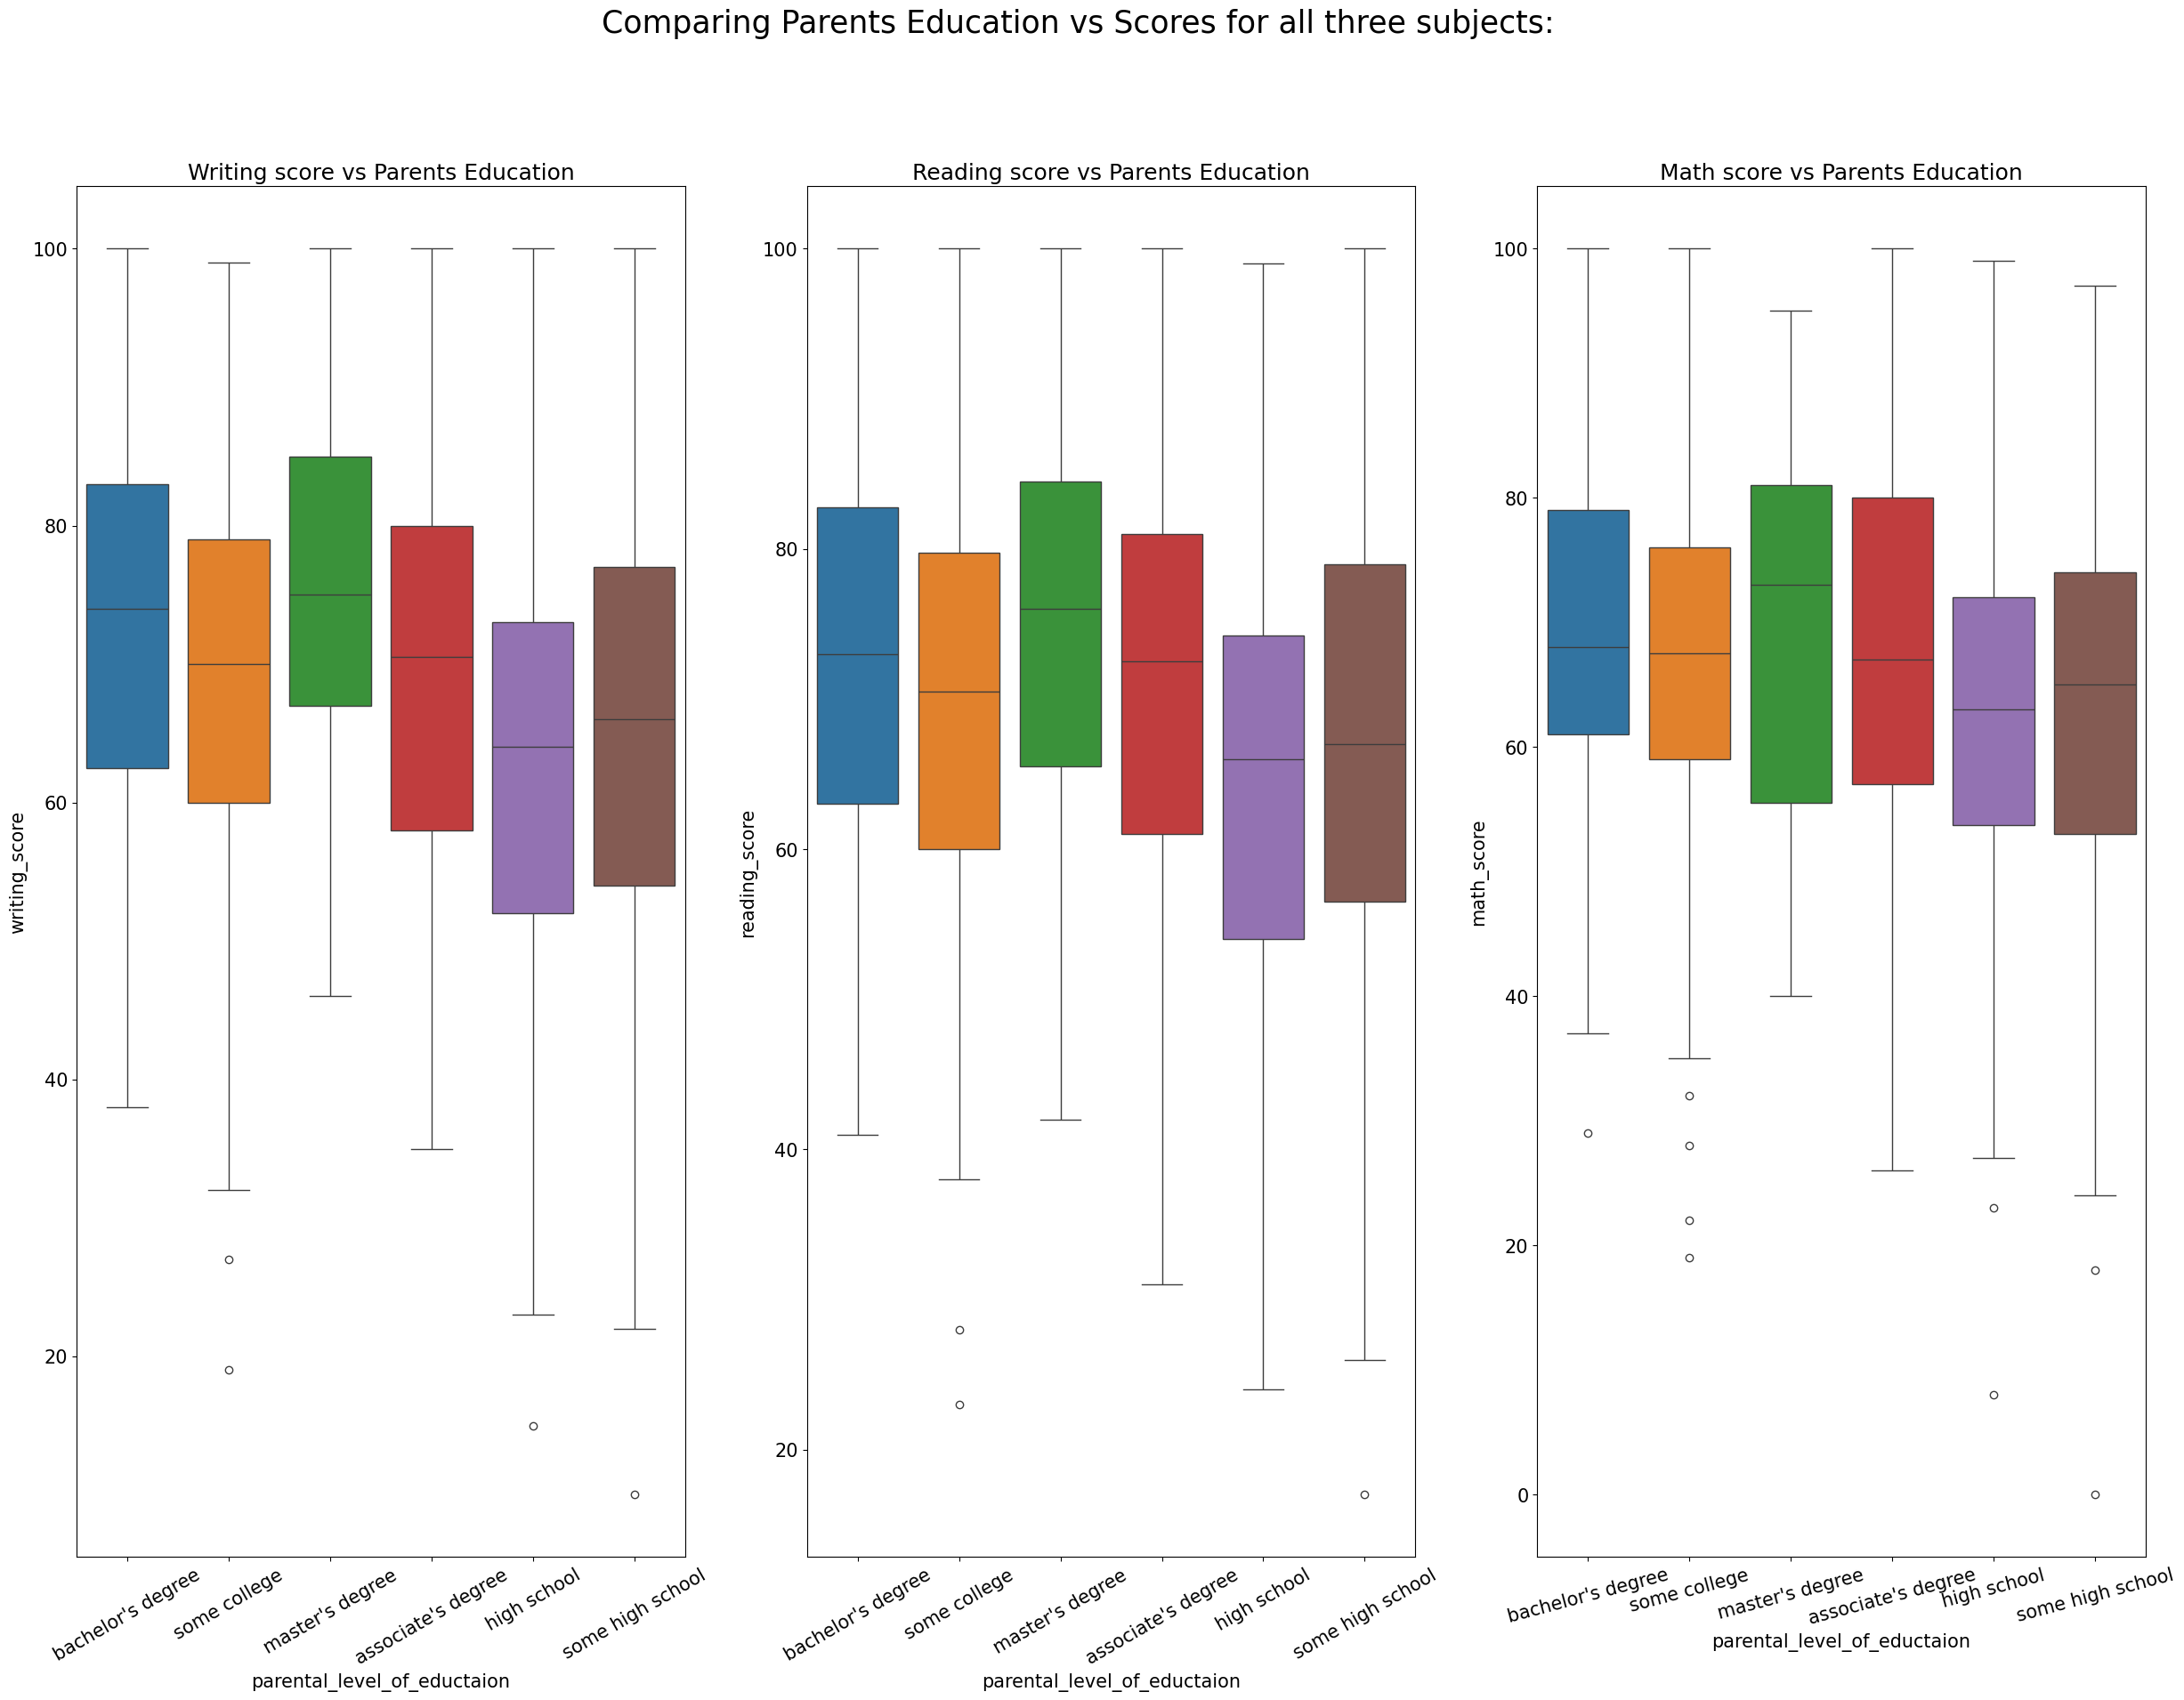

In [66]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3)
fig.suptitle("Comparing Parents Education vs Scores for all three subjects:" , fontsize= 25)

sns.boxplot(x = "parental_level_of_eductaion", y="writing_score", hue="parental_level_of_eductaion" , data=df , ax=ax1)
ax1.title.set_text("Writing score vs Parents Education")
var1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 30)

sns.boxplot(x = "parental_level_of_eductaion", y="reading_score", hue="parental_level_of_eductaion" , data=df , ax=ax2)
ax2.title.set_text("Reading score vs Parents Education")
var2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation = 30)


sns.boxplot(x = "parental_level_of_eductaion", y="math_score", hue="parental_level_of_eductaion" , data=df , ax=ax3)
ax3.title.set_text("Math score vs Parents Education")
var3 = ax3.set_xticklabels(ax3.get_xticklabels(), rotation = 15)

